# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import scipy as sci
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

%matplotlib inline

temperature_df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
temperature_df.head(10)

temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0

In [3]:
temperature_df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

# 1. Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

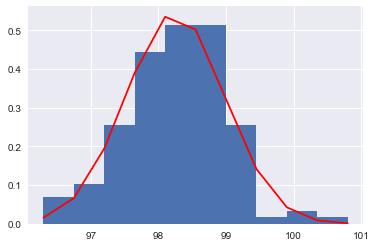

In [4]:
n, bins, patches = plt.hist(temperature_df.temperature, 10, normed=1)
mu = np.mean(temperature_df.temperature)
sigma = np.std(temperature_df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

__To check weather the distribution is normal we can do a Normal test which gives a result of a tuple with Chi-Squared Statistic and the associated p-value.__

__Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.__

In [5]:
import scipy.stats as stats
x = temperature_df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

__There for we cannot reject the null hypothesis and the temperature of human body is normally distributed__

## 2. Is the sample size large? Are the observations independent?

In [6]:
len(temperature_df.temperature)

130

* __Sample Size greater than 30 is generally considered ar large sample.__

* __The observations are independent because They have been randombly selected__


# 3. Is the true population mean really 98.6 degrees F?

Since we have a relatively large sample size, we can use z-test. 
t-test will also produce simiar result as z-test because degree of freedom is relatively higher in this case with 129.

In [7]:
t = temperature_df.sort_values(by=['temperature'])
t = temperature_df['temperature']
z = (98.6 - np.mean(t)) / (np.std(t) / math.sqrt(len(temperature_df)))
print('z score is %.3F and pvalue is %.9F' % (z, stats.norm.sf(z)*2))

z score is 5.476 and pvalue is 0.000000044


* __H0: The population mean for temperature is 98.6 degrees F__
* __HA: The population mean is not equal to 98.6 degree F__
* Based on the calculation in the cell above, 
* __z score is 5.476__ and two sided __p-value is 0.000000044__.
* Since p value is smaller than the significant level of 0.025, 
__we can reject the null hypothesis that population mean of the temperature is 98.6 degrees F__


# 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [8]:
marginoferror = stats.norm.ppf(0.975) * np.std(t)
print ('95% of confidence level Confidence Interval is:', np.mean(t) - marginoferror, np.mean(t) + marginoferror)

95% of confidence level Confidence Interval is: 96.8177558267 99.6807057117


Therefore,
With 95% Confidence we can say,

The Temperatures __Below 96.82__ and __Above 99.68__ can considerd as the abnormal body temperature.

# 5. Is there a significant difference between males and females in normal temperature?

Hypothesis testing:

H0: muMale - muFemale = 0

HA: muMale - muFemale !=0


where x = xdiff
So, the CI are: $$ CI = (0.0, -0.58)$$
We see again as the null hypothesis mu_M-mu_F=0 falls on the lower boundary condition. Let's calculate the p-value.

In [9]:
female=temperature_df[temperature_df.gender=='F']
male=temperature_df[temperature_df.gender=='M']

## Descriptive Statistics for Male

In [10]:
male.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

## Descriptive Statistics for Female

In [11]:
female.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [12]:
s_Male=0.698756
s_Female=0.743488
n=65
x_Male=98.104615
x_Female=98.393846

In [13]:
SE_Female= round((((s_Male**2)+(s_Female**2))/n)**0.5,2)
SE_Female

0.13

SExM-xF</sub> = 0.13

(xM-xF) +- (ZÂ· SExM-xF</sub>)
SExM-xF</sub> = 0.13

In [14]:
x_diff=round(x_Male-x_Female,2)
x_diff

-0.29

(xM-xF) = xdiff = -0.29

In [15]:
Z= round(((x_diff - 0)/SE_Female),2)
z

5.475925202078116

$$Z = \frac{x - \mu}{SE}= -5.476 $$

where x = xdiff


In [16]:
CI_min= round(x_diff+(Z*SE_Female),2)
CI_max= round(x_diff-(Z*SE_Female),2)

In [17]:
CI_min

-0.58

In [18]:
abs(CI_max)

0.0

So, the Confidence Interval is: $$ CI = (0.0, -0.58)$$
We see again as the null hypothesis mu_M-mu_F=0 falls on the lower boundary condition. Let's calculate the p-value.

Calculate the p-value:
* P-Value = P(Xdiff< -0.29)*2 = 0.01285*2 = 0.0257

We can reject the null hypothesis as the p-value is 2.57%, indicating that there is a significant difference between males and females in normal temperature.